# Task C: Let's stay together, Circular orbit

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

First we have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$ (equal to zero since we're working with a circular orbit).

In [2]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e = 0               # we're in a circular orbit

part = ic_two_body(mass1, mass2, rp, e)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$. The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system.

In [3]:
a = rp / (1 - e)
M_tot = np.sum(part.mass)

P = np.sqrt((4 * np.pi**2. * a**3.)/(M_tot))
print(P)

40.55778675973612


The initial energy is:

Using the initial conditions we gave as input, the period is $P = 40.56$

## Evolution of the binary system

We have now to evolve the binary system from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration. 

### Functions

First we define some functions, one for each integrator (`integration_euler`, `integration_leapfrog` and `integration_rungekutta`) and one for the total energy error (`total_energy_error`).

In [4]:
def integration_euler(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_euler = []
    Ekin_euler = []
    Epot_euler = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_euler(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_euler.append(Etot_n)
            Ekin_euler.append(Ekin_n)
            Epot_euler.append(Epot_n)

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_euler = np.array(Etot_euler)
    Ekin_euler = np.array(Ekin_euler)
    Etot_euler = np.array(Epot_euler)

    return path_1, path_2, Etot_euler, Ekin_euler, Epot_euler

In [5]:
def integration_leapfrog(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_leapfrog = []
    Ekin_leapfrog = []
    Epot_leapfrog = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_leapfrog.append(Etot_n)
            Ekin_leapfrog.append(Ekin_n)
            Epot_leapfrog.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_leapfrog = np.array(Etot_leapfrog)
    Ekin_leapfrog = np.array(Ekin_leapfrog)
    Epot_leapfrog = np.array(Epot_leapfrog)

    return path_1, path_2, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog

In [6]:
def integration_rungekutta(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_rungekutta = []
    Ekin_rungekutta = []
    Epot_rungekutta = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_rungekutta(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_rungekutta.append(Etot_n)
            Ekin_rungekutta.append(Ekin_n)
            Epot_rungekutta.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_rungekutta = np.array(Etot_rungekutta)
    Ekin_rungekutta = np.array(Ekin_rungekutta)
    Epot_rungekutta = np.array(Epot_rungekutta)

    return path_1, path_2, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta

In [7]:
def total_energy_error(Etot, t, tsimulation, h):
    energy_error = np.zeros_like(Etot)

    for i in range(len(Etot)):
        energy_error[i] = np.abs((Etot[i] - Etot[0])/Etot[0])

    time = np.arange(0, tsimulation, h)

    return energy_error, time

Define the constants

In [8]:
h = 0.01
t = 0
tsimulation = 10 * P
N = 2

## Let's integrate
### Euler

Let's start with `integration_euler`. First we integrate the orbit

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


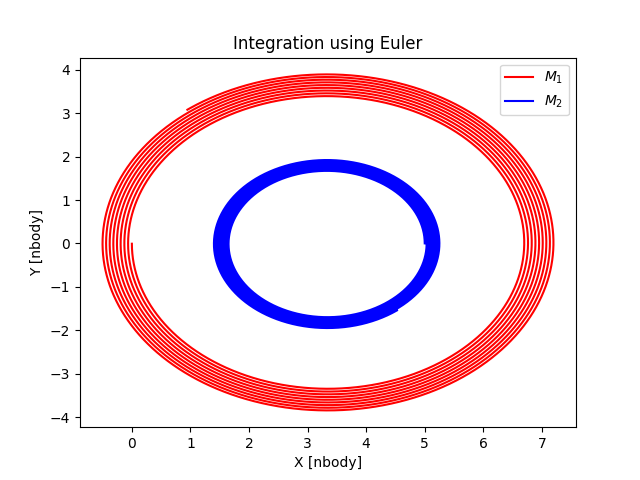

In [9]:
# EULER
part_euler = part.copy()
path1_euler, path2_euler, Etot_euler, Ekin_euler, Epot_euler = integration_euler(part_euler, h, tsimulation, t, N)

# PLOT EULER
plt.title('Integration using Euler')
plt.plot(path1_euler[:,0], path1_euler[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler[:,0], path2_euler[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

And then we plot the relative energy as a function of time.

In [ ]:
energy_error_euler, time_euler = total_energy_error(Etot_euler, t, tsimulation, h)

# ENERGY ERROR PLOT FOR EULER
plt.plot(time_euler, energy_error_euler, label='Euler')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend()


### Leapfrog

Now let's use `integration_leapfrog`.

In [ ]:
# LEAPFROG
part_leapfrog = part.copy()
path1_leapfrog, path2_leapfrog, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog = integration_leapfrog(h, tsimulation, t, N)

# PLOT LEAPFROG
plt.title('Integration using Leapfrog')
plt.plot(path1_leapfrog[:,0], path1_leapfrog[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog[:,0], path2_leapfrog[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

In [ ]:
# TOTAL ENERGY ERROR LEAPFROG
energy_error_leapfrog, time_leapfrog = total_energy_error(Etot_leapfrog, t, tsimulation, h)

# ENERGY ERROR PLOT EULER AND LEAPFROG
plt.plot(time_euler, energy_error_euler, label='Euler')
plt.plot(time_leapfrog, energy_error_leapfrog, label='Leapfrog')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend()

### Runge-Kutta 4th Order

Last but not least, `integration_rungekutta`.

In [ ]:
# RUNGE-KUTTA
part_rungekutta = part.copy()
path1_rungekutta, path2_rungekutta, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta = integration_rungekutta(part_rungekutta, h, tsimulation, t, N)

# PLOT RUNGE-KUTTA
plt.title('Integration using Runge-Kutta')
plt.plot(path1_rungekutta[:,0], path1_rungekutta[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta[:,0], path2_rungekutta[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

In [ ]:
# TOTAL ENERGY ERROR RUNGE-KUTTA
energy_error_rungekutta, time_rungekutta = total_energy_error(Etot_rungekutta, t, tsimulation, h)

# TOTAL ENERGY ERROR ALL TOGETHER
plt.plot(time_euler, energy_error_euler, label='Euler')
plt.plot(time_leapfrog, energy_error_leapfrog, label='Leapfrog')
plt.plot(time_rungekutta, energy_error_rungekutta, label='Runge-Kutta')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend(loc='upper right')

### Energies and Errors

Let us now grup all the Energies. First we plot them separately.

In [ ]:
plt.figure(figsize=(12,4))

#PLOT Euler
plt.subplot(1,3,1)
plt.title('E(t) using Euler')
plt.plot(time_euler, Etot_euler, label='Euler', color='C0')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
plt.legend(loc='upper left')

#PLOT Leapfrog
plt.subplot(1,3,2)
plt.title('E(t) using Leapfrog')
plt.plot(time_leapfrog, Etot_leapfrog, label='Leapfrog', color='C1')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
plt.legend(loc='upper left')

#PLOT Runge-Kutta
plt.subplot(1,3,3)
plt.title('E(t) using Runge-Kutta')
plt.plot(time_rungekutta, Etot_rungekutta, label='Runge-Kutta', color='C2')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
#plt.ylim(-0.172, -0.171)
#plt.ylim(bottom=-100)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Now, we make a comparison. In order to do this final step we need to scale the axis logaritmically.

In [ ]:
#PLOT Energy comparison 
plt.figure(figsize=(12,4))

#PLOT non logaritmically
plt.subplot(1,2,1)
plt.title('Energy comparison between the three methods')
plt.plot(time_euler,        Etot_euler,         label='Euler',          color='C0')
plt.plot(time_leapfrog,     Etot_leapfrog,      label='Leapfrog',       color='C1')
plt.plot(time_rungekutta,   Etot_rungekutta,    label='Runge-Kutta',    color='C2', linestyle='dotted')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')
plt.legend()

#PLOT logaritmically
plt.subplot(1,2,2)
plt.title('Energy comparison between the three methods (logaritmic scale)')
plt.plot(time_euler,        abs(Etot_euler),        label='Euler',      color='C0')
plt.plot(time_leapfrog,     abs(Etot_leapfrog),     label='Leapfrog',   color='C1')
plt.plot(time_rungekutta,   abs(Etot_rungekutta),   label='Runge-Kutta',color='C2', linestyle='dotted')
plt.xlabel('t [nbody]')
plt.ylabel('log(E) [nbody]')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()


### Comments

The results found before are in line with the theoretical expectations. 
In fact, the precision of the integration methods increases from the Euler (least precise), passing through the Leapfrog, and arriving to the Runge Kutta (most precise). 

Also concerning the energy things seem to work. In fact, the curves ef the relative energies are totally in accordance with what seen at lecture. In particular, The largest error on the energy is the one relative to the Euler method (up to $10^{-1}$ in our case); for the Leapfrog we have instead a maximum of $10^{-8}$ and for the Runge-Kutta a maximum of $10^{-13}$.

## Benchmark with different timesteps
Now we have to redo all the three integrations using different timesteps.

In [ ]:
tstep = [0.1, 0.01, 0.001]

plt.figure(figsize=(15,5))

for tstep in tstep:
    part_euler = part.copy()
    path1_euler, path2_euler, Etot_euler, Ekin_euler, Epot_euler = integration_euler(part_euler, tstep, tsimulation, t, N)
    energy_error_euler, time_euler = total_energy_error(Etot_euler, t, tsimulation, tstep)

    plt.subplot(1,3,1)
    plt.plot(time_euler, energy_error_euler, label=f'h={tstep}')
    plt.yscale('log')
    plt.xlabel('time [nbody]')
    plt.ylabel(f'$|(E-E_0)/E_0|$')
    plt.title('Euler')
    plt.legend(loc='upper right')

    part_leapfrog = part.copy()
    path1_leapfrog, path2_leapfrog, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog = integration_leapfrog(part_leapfrog, tstep, tsimulation, t, N)
    energy_error_leapfrog, time_leapfrog = total_energy_error(Etot_leapfrog, t, tsimulation, tstep)

    plt.subplot(1,3,2)
    plt.plot(time_leapfrog, energy_error_leapfrog, label=f'h={tstep}')
    plt.yscale('log')
    plt.xlabel('time [nbody]')
    plt.ylabel(f'$|(E-E_0)/E_0|$')
    plt.title('Leapfrog')
    plt.legend(loc='upper right')

    part_rungekutta = part.copy()
    path1_rungekutta, path2_rungekutta, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta = integration_rungekutta(part_rungekutta, tstep, tsimulation, t, N)
    energy_error_rungekutta, time_rungekutta = total_energy_error(Etot_rungekutta, t, tsimulation, tstep)

    plt.subplot(1,3,3)
    plt.plot(time_rungekutta, energy_error_rungekutta, label=f'h={tstep}')
    plt.yscale('log')
    plt.xlabel('time [nbody]')
    plt.ylabel(f'$|(E-E_0)/E_0|$')
    plt.title('Runge-Kutta')
    plt.legend(loc='upper right')

    plt.tight_layout()
    
    


### Comments
The plots above show show how the energy error varies as function of the timestep. The results are in line with the theoretical expectation, in particular for what concerns the Runge-Kutta method we see that we have a difference of 4 orders of magnitude between $h=0.1$ and $h=0.01$ but then we hit the machine precision, leading to a messy plot that cannot be improved without specific procedures. 


## Animation prova

In [10]:
import matplotlib.animation as anim

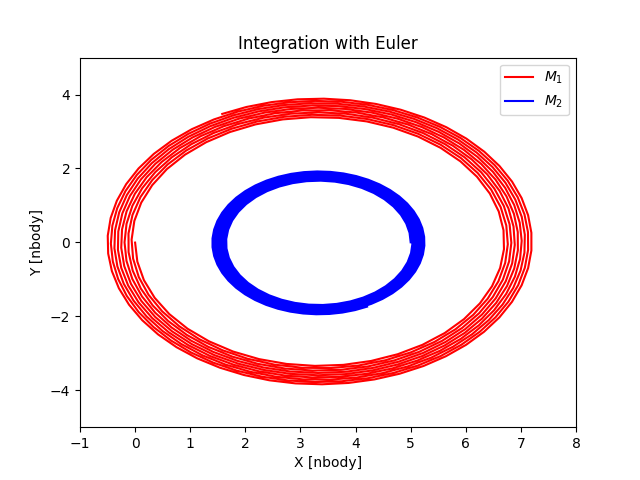

In [15]:
path_length = len(path1_euler)
subsample = 100

x1 = path1_euler[::subsample, 0]
y1 = path1_euler[::subsample, 1]
x2 = path2_euler[::subsample, 0]
y2 = path2_euler[::subsample, 1]

fig, ax = plt.subplots()

traj_1, = ax.plot([], [], label=f'$M_1$', color = 'red')  
traj_2, = ax.plot([], [], label=f'$M_2$', color = 'blue')

ax.set_xlim(-1, 8)
ax.set_ylim(-5, 5)

def animate(i):
    idx = min(i * subsample, path_length - 1)
    traj_1.set_data(x1[:i], y1[:i])  # Update the data for trajectory 1
    traj_2.set_data(x2[:i], y2[:i])  # Update the data for trajectory 2

    return traj_1, traj_2

frames = int(np.ceil(path_length / subsample))
animation = anim.FuncAnimation(fig, animate, frames=frames, blit=True)

plt.title('Integration with Euler')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()  
animation.save('evolution_circular_euler_60fps.gif', writer = 'pillow', fps = 60)
